In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [3]:
# since we already know that column 0 is the date then we set that as the index
# Note When reading timestamp columns from a CSV file, the option parse_dates=True is a useful shortcut if the 
#     timestamp is the index.
# Otherwise parse_dates=['col_name'] works as well.
bike = pd.read_csv('../Data/train.csv', sep=',', index_col=0, parse_dates=True)

### import the data from **Bike Sharing Demand**

## EDA bike dataframe

* datetime: hourly date + timestamp  
* season:
    - 1 = spring 
    - 2 = summer
    - 3 = fall
    - 4 = winter 
* holiday: whether the day is considered a holiday
* workingday: whether the day is neither a weekend nor holiday
* weather: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp: temperature in Celsius
* atemp: "feels like" temperature in Celsius
* humidity: relative humidity
* windspeed: wind speed
* casual: number of non-registered user rentals initiated
* registered: number of registered user rentals initiated
* count: number of total rentals

In [4]:
bike.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
# drop: 'atemp' beacuse it has a 0.98 correlation with 'temp'
# drop: 'casual' and 'registered' because the sum of this is the total rental ('count') 
# ----> which could potentially give redundant info and cause leakage in the model prediction
bike.head(4)
bike.drop(columns=['casual', 'registered', 'atemp'], inplace=True)

In [6]:
#bike[['temp', 'humidity', 'windspeed', 'count']].describe()

### taking info from the **datatime** column(index) to add additional features of high importance

In [7]:
bike['month'] = bike.index.month
bike['week'] = bike.index.weekday
bike['hour'] = bike.index.hour
bike['year'] = bike.index.year


In [8]:
bike['month'].unique()
#bike['hour'].unique()
#bike['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [9]:
# week = hot encode = meaning that each day will have its own column 
# ---> making working day irrelevant and redundant data 
# ---> drop that column 'working day'
check = bike[['workingday', 'week']]
check.head(5)

,workingday,week
datetime,,
2011-01-01 00:00:00,0,5
2011-01-01 01:00:00,0,5
2011-01-01 02:00:00,0,5
2011-01-01 03:00:00,0,5
2011-01-01 04:00:00,0,5


In [10]:
bike.drop(columns=['workingday'], inplace=True)
bike.head(5)

,season,holiday,weather,temp,humidity,windspeed,count,month,week,hour,year
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,1,5,0,2011
2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,1,5,1,2011
2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,1,5,2,2011
2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,1,5,3,2011
2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,1,5,4,2011


In [21]:
bike.drop(columns=['month'], inplace=True)

In [22]:
# scatter matrix for all features
#pd.plotting.scatter_matrix(bike[['temp', 'humidity', 'windspeed']])

Text(0.5, 1.0, 'Correlation Heatmap')

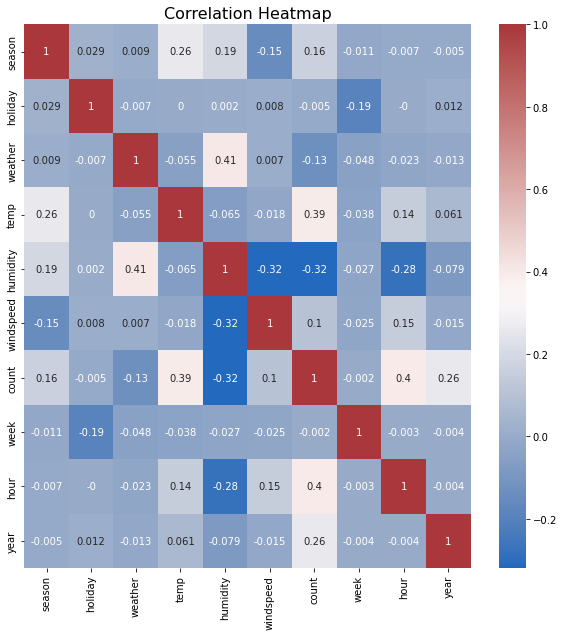

In [23]:
# pearson correlation is best for numerical features 
# not the best for the categorical features 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data=bike.corr().round(3), cmap="vlag", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16})

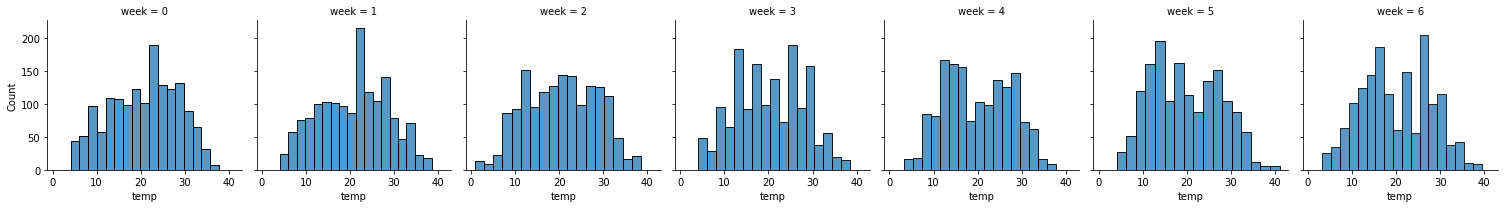

In [24]:
# Facetgrid to look at several plots simultaneously
ag = sns.FacetGrid(bike, col="week")
ag.map(sns.histplot, "temp")

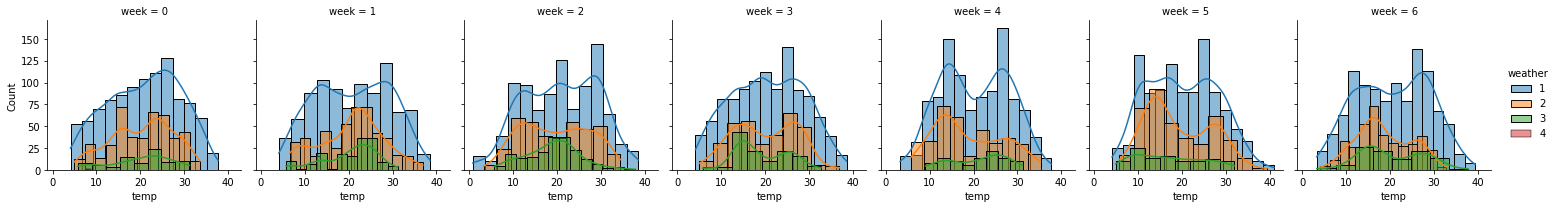

In [25]:
cg = sns.FacetGrid(bike, col="week", hue='weather')
cg.map(sns.histplot, "temp", kde=True, multiple="stack")
cg.add_legend()

In [26]:
#bg = sns.FacetGrid(bike, row='hour')
#bg.map(sns.histplot, "temp")
#bg.add_legend()

In [27]:
#plt.figure(figsize=(8, 8))
#sns.lineplot(data=bike, x='temp', y='count', hue='month')

#the ideal temperature for max rentals is within a range of 25 - 33 degrees

In [28]:
#plt.figure(figsize=(8, 8))
#sns.lineplot(data=bike, x='humidity', y='count', hue='year')

In [29]:
#plt.figure(figsize=(8, 8))
#sns.histplot(data=bike, x='temp', hue='weather', kde=True, multiple="stack")

# dropped 'month'

In [30]:
# features
X = bike[['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'year', 'week']]

# label
y = bike['count']

### Preprocessing and feature engineering features

In [31]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

order: of my df --> 

season	- holiday	- weather	- temp	- humidity	- windspeed	- week	- hour	- year

## Plan B: 

    * OneHotEncode ---> week, year, season, weather
    * Kbins ---> hours
    * standard scaler ---> temp, humidity, windspeed
    * pass through ---> holiday

In [32]:
ohe = ['week', 'year', 'season', 'weather']
pipeline1 = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
)

In [33]:
def day_rush(df):
    df.loc[(df['hour']>= 0) & (df['hour'] < 5), 'hour'] = 0
    df.loc[(df['hour']>= 5) & (df['hour'] < 10), 'hour'] = 1
    df.loc[(df['hour']>= 10) & (df['hour'] < 15), 'hour'] = 2
    df.loc[(df['hour']>= 15) & (df['hour'] < 19), 'hour'] = 3
    df.loc[(df['hour']>= 19) & (df['hour'] <= 23), 'hour'] = 4
   
    return df[['hour']]

In [34]:
pipeline2 = make_pipeline(
    FunctionTransformer(day_rush), 
    OneHotEncoder(handle_unknown="ignore")
    )

In [35]:
# temp, humidity, windspeed, year, month, season, weather
scaler = ['temp', 'humidity', 'windspeed']
pipeline3 = make_pipeline(
    MinMaxScaler(), 
    )

In [36]:
# months would be the same as seasons
pipeline4 = make_pipeline(
    KBinsDiscretizer(n_bins=4, strategy='quantile')
)

# passthrough = holiday

In [38]:
preprocessor_b = ColumnTransformer(
    transformers=[
        ('ohe', pipeline1, ohe),
        ('my_func', pipeline2, ['hour']),
        ('scaler', pipeline3, scaler)
     ],
        remainder='passthrough')

### Make pipeline for models 

* behaves as your transformer


In [39]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)
X_train.shape, y_train.shape

((6531, 9), (6531,))

In [40]:
X_train.head()

,season,holiday,weather,temp,humidity,windspeed,hour,year,week
datetime,,,,,,,,,
2011-06-04 15:00:00,2,0,2,30.34,27,27.9993,15,2011,5
2012-07-05 08:00:00,3,0,1,32.80,49,8.9981,8,2012,3
2011-10-18 00:00:00,4,0,1,19.68,82,0.0000,0,2011,1
2011-01-07 14:00:00,1,0,2,8.20,40,16.9979,14,2011,4
2011-12-01 19:00:00,4,0,1,13.94,46,7.0015,19,2011,3


## train and test **MODEL B**

In [41]:
model_b_lr = make_pipeline(
    preprocessor_b, 
    LinearRegression()
    )

In [42]:
model_b_lr.fit(X_train, y_train)

# calculate the accuracy score from training data
model_b_train_accur = model_b_lr.score(X_train, y_train) 
print('Train accuracy: ', model_b_train_accur)
# calculate the accuracy score from test data
model_b_test_accur = model_b_lr.score(X_test, y_test)
print('Test accuracy: ', model_b_test_accur)

Train accuracy:  0.5291527061487684
Test accuracy:  0.515580036321001


In [43]:
model_b_rfr = make_pipeline(
    preprocessor_b, 
    RandomForestRegressor(n_estimators=100, max_depth=4),
    )

In [44]:
model_b_rfr.fit(X_train, y_train)

# calculate the accuracy score from training data
model_b_train_accur = model_b_rfr.score(X_train, y_train) 
print('Train accuracy: ', model_b_train_accur)
# calculate the accuracy score from test data
model_b_test_accur = model_b_rfr.score(X_test, y_test)
print('Test accuracy: ', model_b_test_accur)

Train accuracy:  0.5380283043927855
Test accuracy:  0.5151560933518815
